In [1]:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")


In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({'font.size':16})

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.signal import savgol_filter

In [5]:
import gwsurrogate


lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [6]:
!ls 

__pycache__                      pn_taylor_eob.py
bam-q1ns-old.ipynb               pn_taylor_eob_example.ipynb
compare-with-nr.ipynb            pn_taylor_eob_test.py
dev.ipynb                        q1-multi-code-comparison.ipynb
hybrid-example.py                q1_32_comparison.ipynb
hybrid_utils.py                  rit-test.ipynb
investigate-double-peak-32.ipynb sxs-cce.ipynb
mayawaves-test.ipynb             sxs.ipynb
mode_32_comparison.ipynb         tetrad-convention.ipynb
phase.ipynb                      waveform_generator.py
plot-surrogate.ipynb


In [7]:
gwsurrogate.catalog.download_path()

'/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads/'

In [8]:
gwsurrogate.catalog.list()

EOBNRv2
SpEC_q1_10_NoSpin
SpEC_q1_10_NoSpin_linear
SpEC_q1_10_NoSpin_linear_alt
NRSur4d2s_TDROM_grid12
NRSur4d2s_FDROM_grid12
NRHybSur3dq8
NRHybSur3dq8_CCE
NRHybSur2dq15
NRSur7dq4
NRHybSur3dq8Tidal
EMRISur1dq1e4
BHPTNRSur1dq1e4


In [9]:
# gwsurrogate.catalog.pull('NRHybSur3dq8')
# gwsurrogate.catalog.pull('NRSur7dq4')

# the following didn't work
# so I downloaded the file by hand from here https://zenodo.org/record/8246990/files/NRHybSur3dq8_CCE.h5
# and put it in /opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads/
# gwsurrogate.catalog.pull('NRHybSur3dq8_CCE')

In [54]:
# sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8')
# sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
sur = gwsurrogate.LoadSurrogate('NRHybSur3dq8_CCE')

Loaded NRHybSur3dq8_CCE model


In [55]:
sur.h5filename

'/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/gwsurrogate/surrogate_downloads//NRHybSur3dq8_CCE.h5'

In [56]:
sur.hard_param_lims

[10.01, 1]

In [57]:
sur.keywords

{'Precessing': False,
 'Hybridized': True,
 'Eccentric': False,
 'Tidal': False,
 'nonGR': False}

In [58]:
sur.name

'NRHybSur3dq8_CCE'

In [59]:
sur.soft_param_lims

[8.01, 0.801]

In [60]:
# q = 7
# chiA = [0, 0, 0.5]
# chiB = [0, 0, -0.7]

# q = 5
# chiA = [0, 0, 0.]
# chiB = [0, 0, 0.]

# q = 1
q = 4
chiA = [0, 0, 0.]
chiB = [0, 0, 0.]


### ExtrapStrain_RIT-BBH-0245-n120.h5
# q = 2
# chiA = [0, 0,  -0.851371156019426]
# chiB = [0, 0, 0.500030879793532]

###
# ExtrapStrain_RIT-BBH-0337-n120.h5
# q = 4.9957
# chiA = [0, 0,  0.8514118]
# chiB = [0, 0, -0.50011]

dt = 0.1        # step size, Units of M
# f_low = 5e-3    # initial frequency, Units of cycles/M
# f_low = 1e-2
# f_low = 0.4e-2
f_low = 1e-3
# f_low = 0.006
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low)        # dyn stands for dynamics and is always None for this model

In [61]:
t.shape

(5828312,)

In [62]:
h.keys()

dict_keys([(2, 2), (3, 2), (3, 3), (3, 0), (4, 4), (5, 5), (2, 1), (2, 0), (4, 3), (4, 0), (2, -2), (3, -2), (3, -3), (4, -4), (5, -5), (2, -1), (4, -3)])

In [63]:
dyn

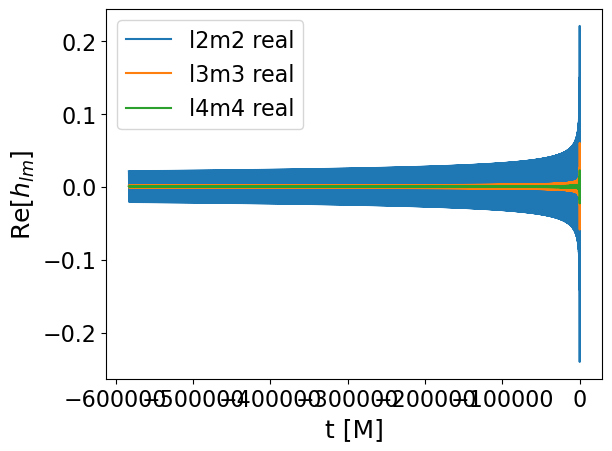

In [64]:
plt.plot(t, h[(2,2)].real, label='l2m2 real')
plt.plot(t, h[(3,3)].real, label='l3m3 real')
plt.plot(t, h[(4,4)].real, label='l4m4 real')
plt.ylabel('Re[$h_{lm}$]', fontsize=18)
plt.xlabel('t [M]', fontsize=18)
plt.legend()

(-100.0, 100.0)

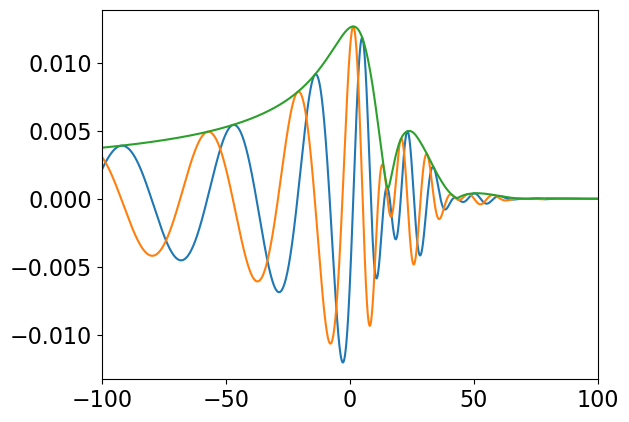

In [65]:
plt.plot(t, h[(3,2)].real)
plt.plot(t, h[(3,2)].imag)
plt.plot(t, np.abs(h[(3,2)]))
plt.xlim(-100, 100)

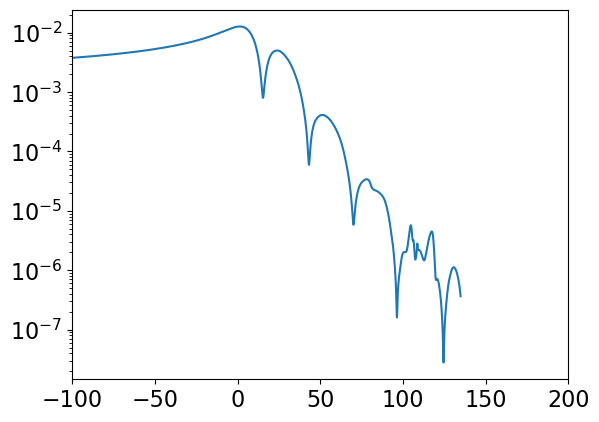

In [66]:
plt.plot(t, np.abs(h[(3,2)]))
plt.xlim(-100, 200)
plt.yscale('log')

In [67]:
h.keys()

dict_keys([(2, 2), (3, 2), (3, 3), (3, 0), (4, 4), (5, 5), (2, 1), (2, 0), (4, 3), (4, 0), (2, -2), (3, -2), (3, -3), (4, -4), (5, -5), (2, -1), (4, -3)])

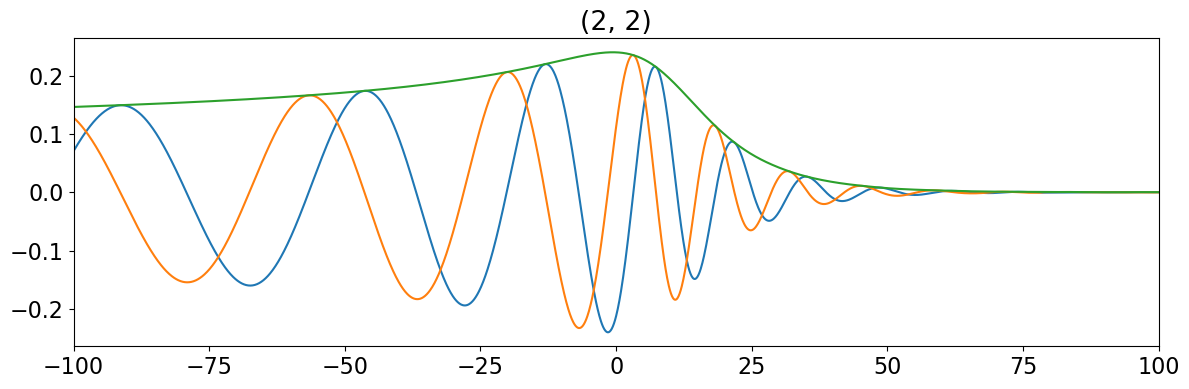

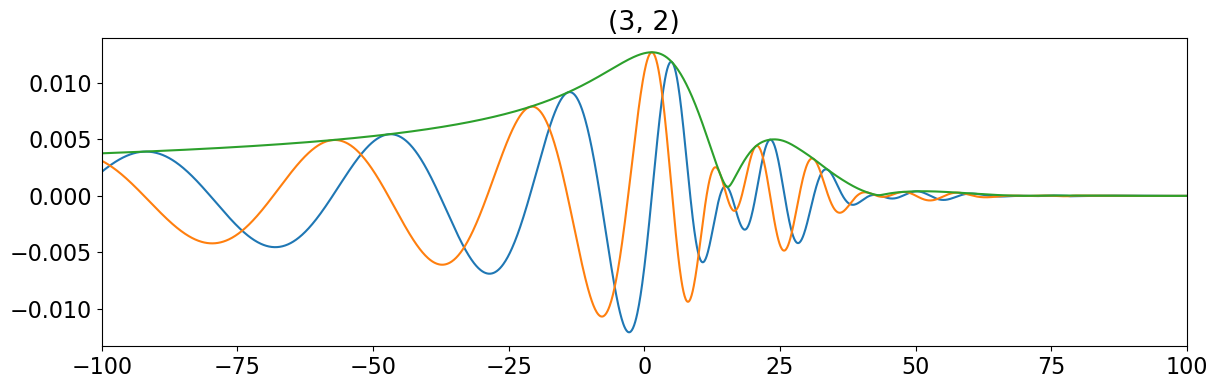

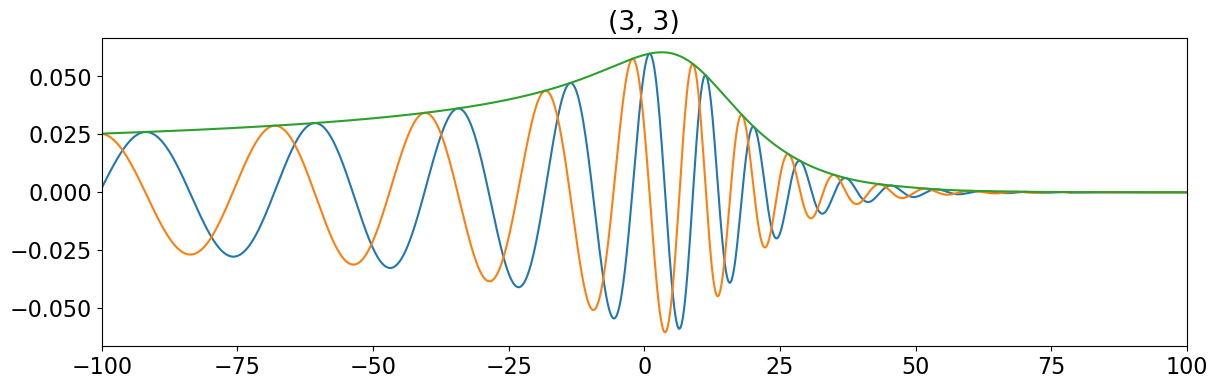

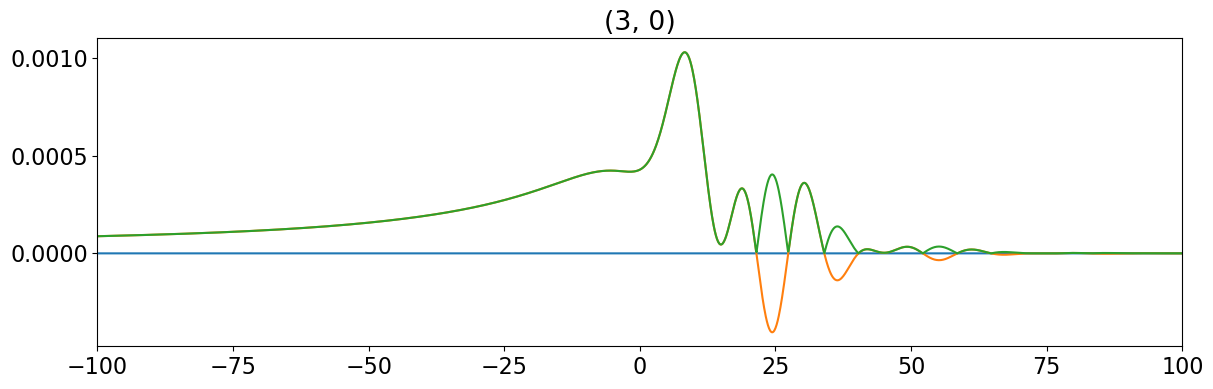

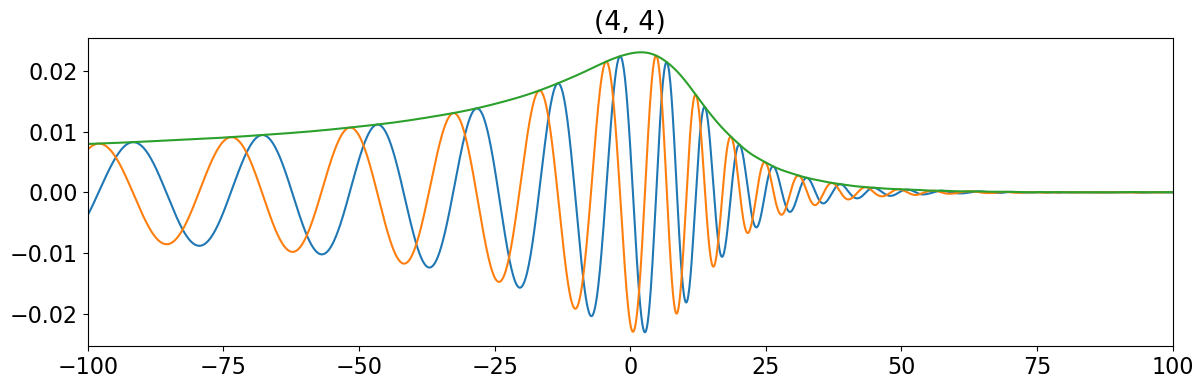

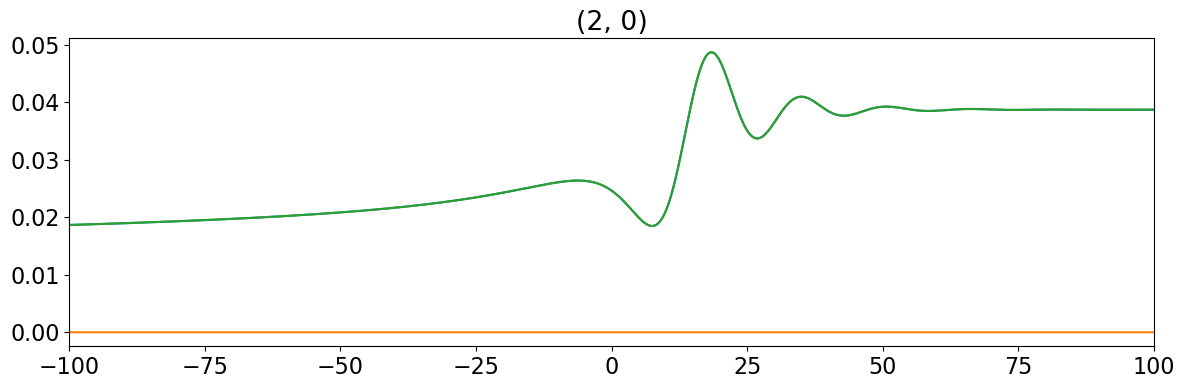

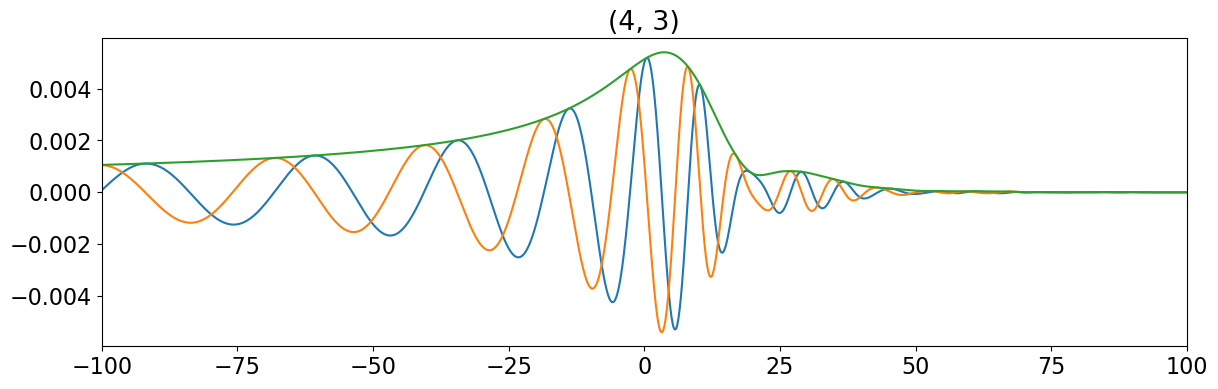

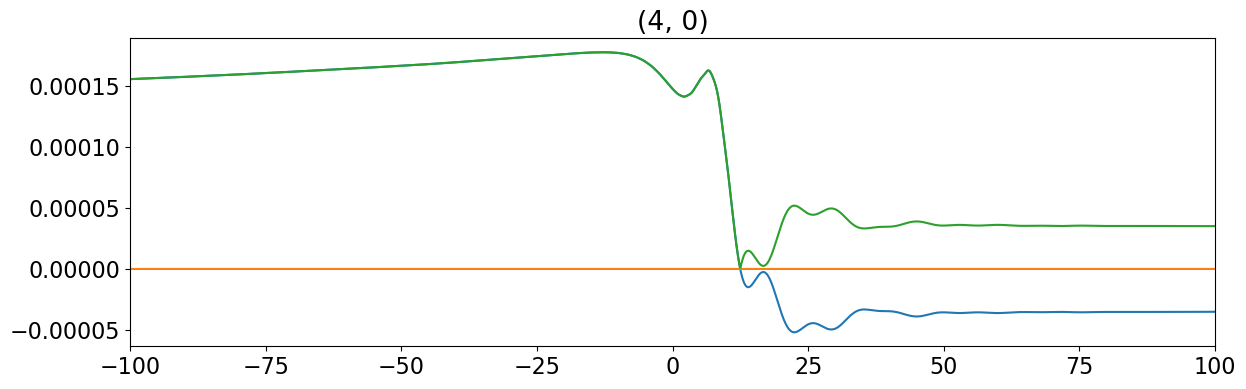

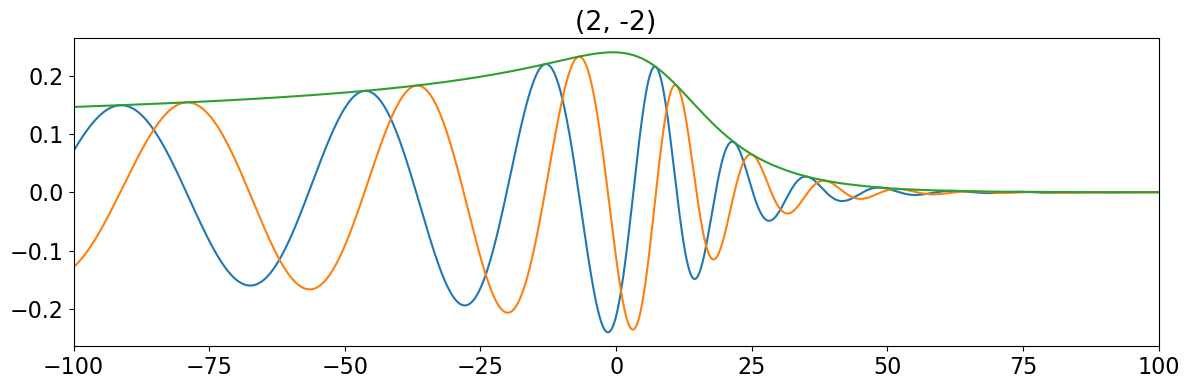

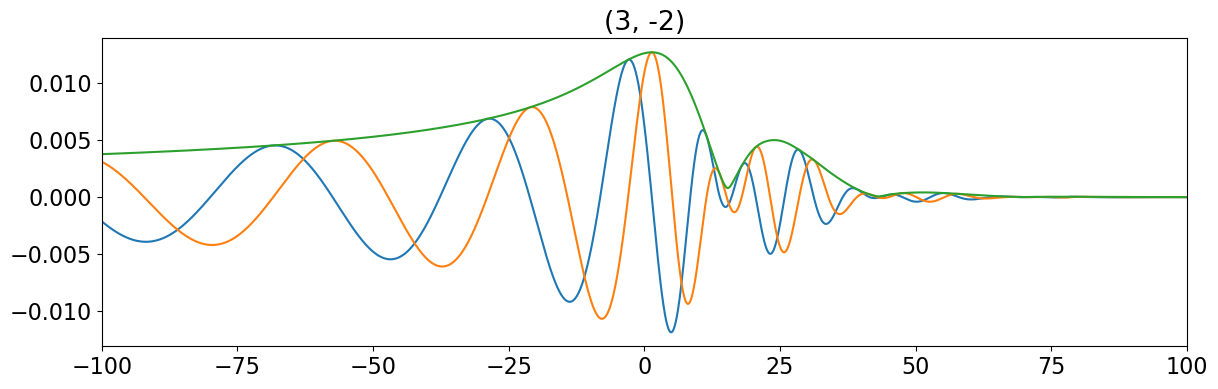

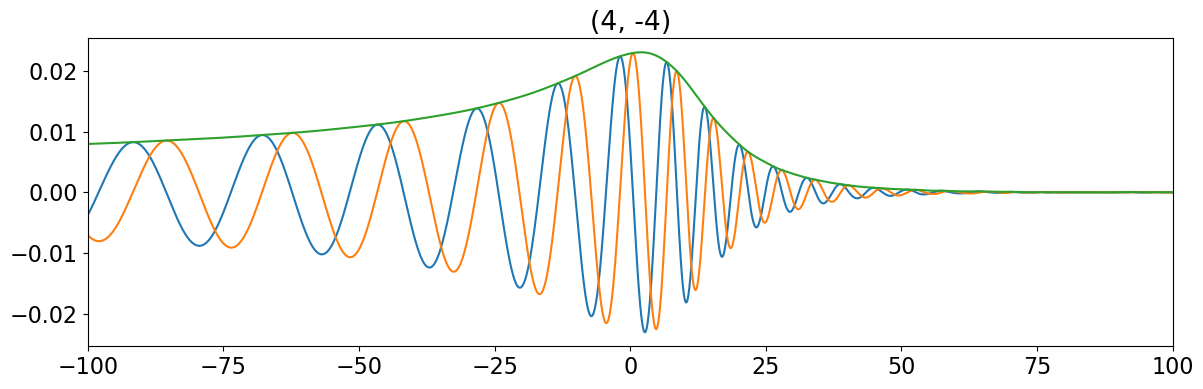

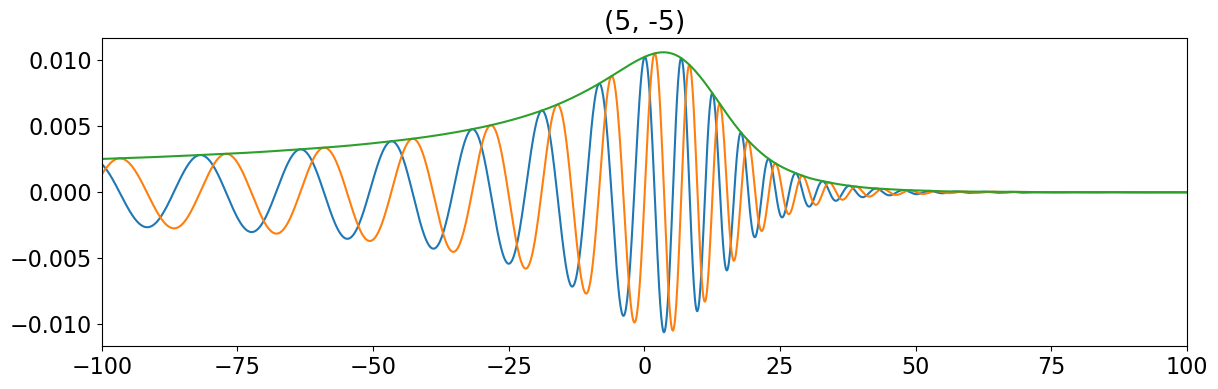

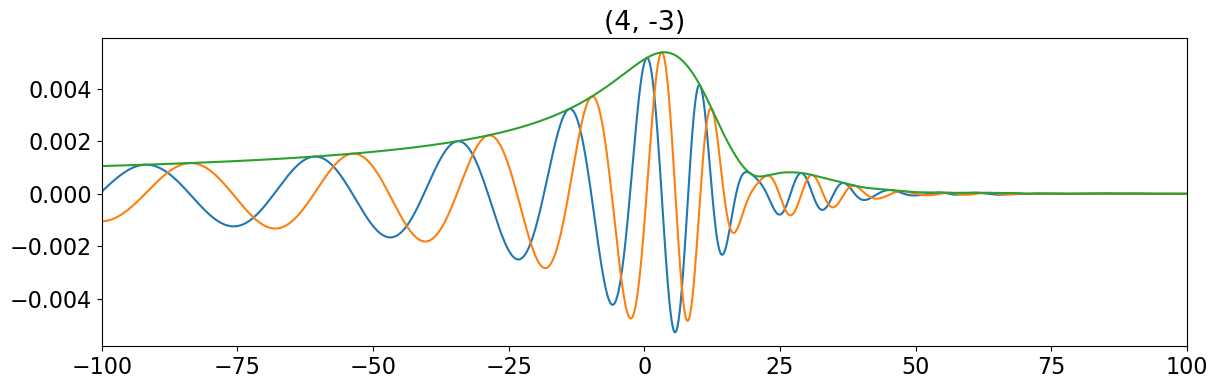

In [68]:
for lm in h.keys():
    plt.figure(figsize=(14, 4))
    plt.plot(t, h[lm].real)
    plt.plot(t, h[lm].imag)
    plt.plot(t, np.abs(h[lm]))
    plt.xlim(-100, 100)
    plt.title(lm)
    plt.show()
    plt.close()

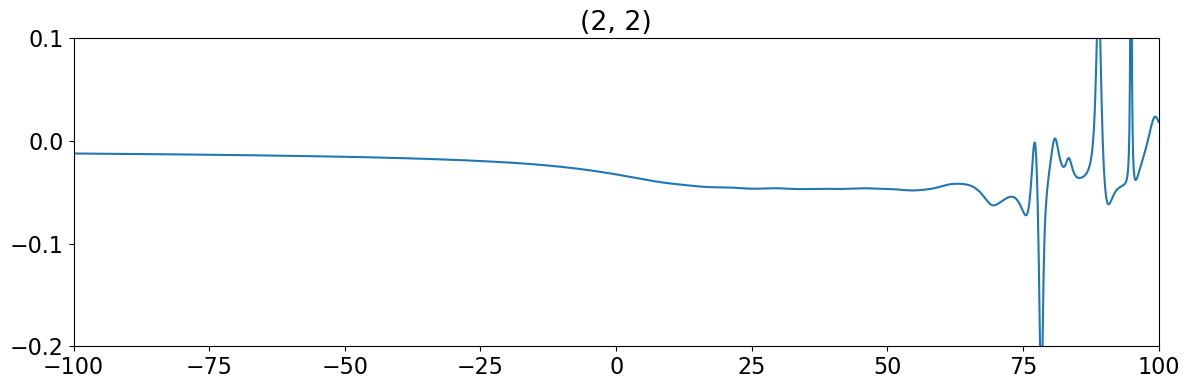

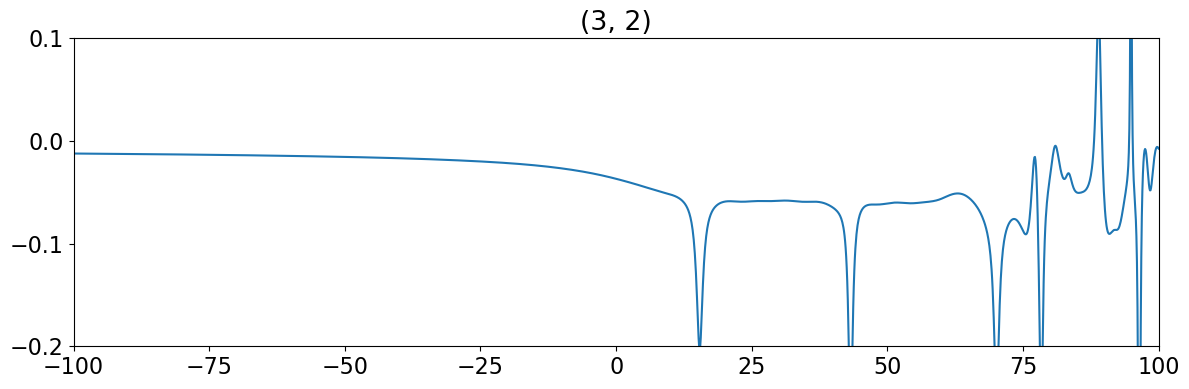

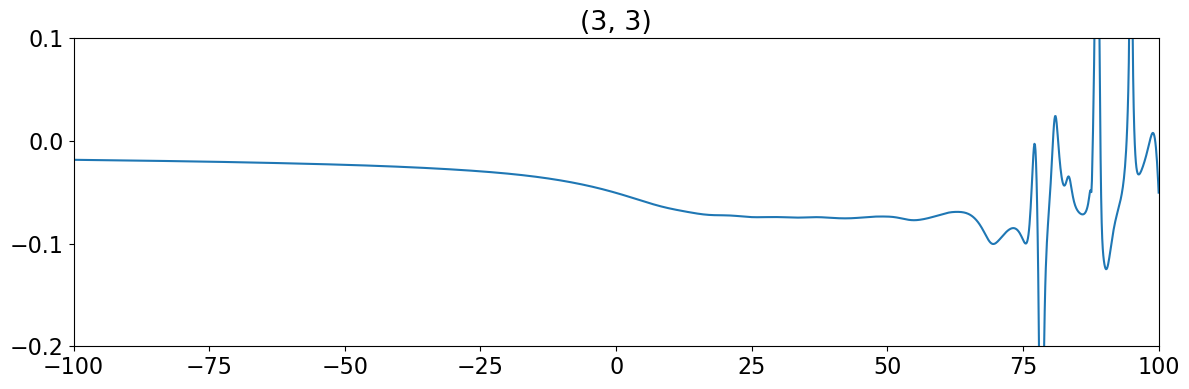

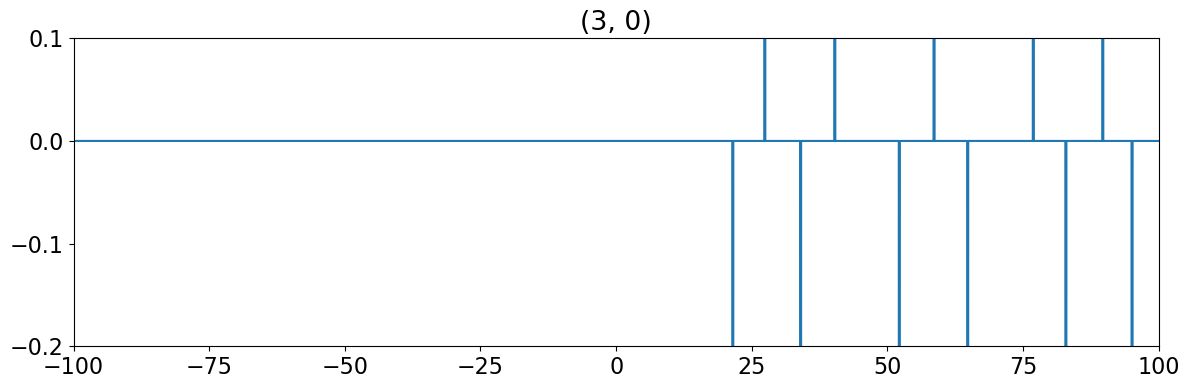

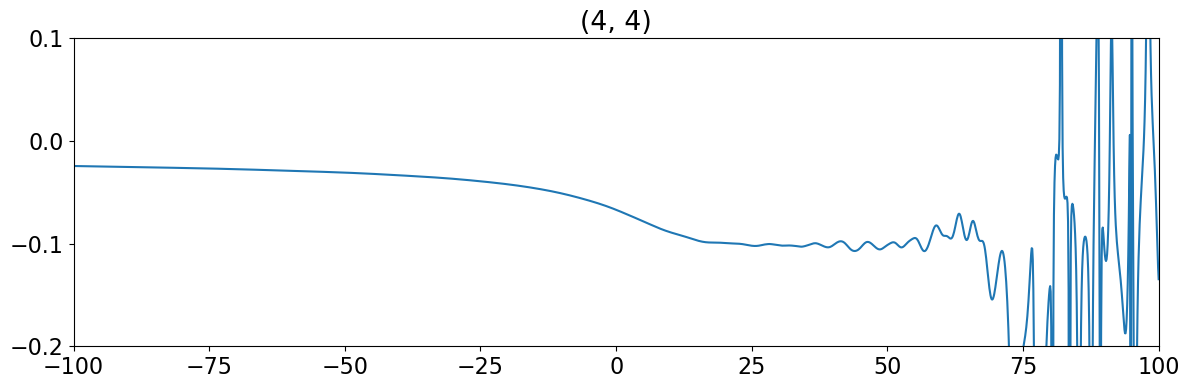

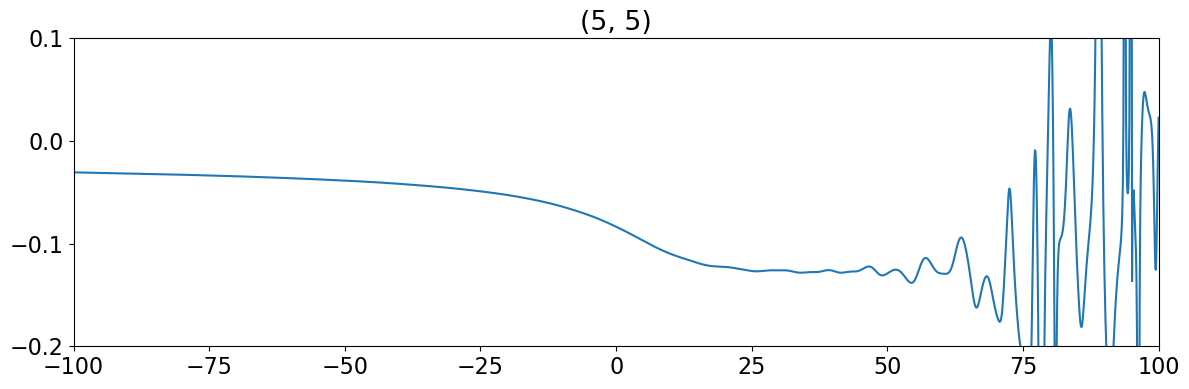

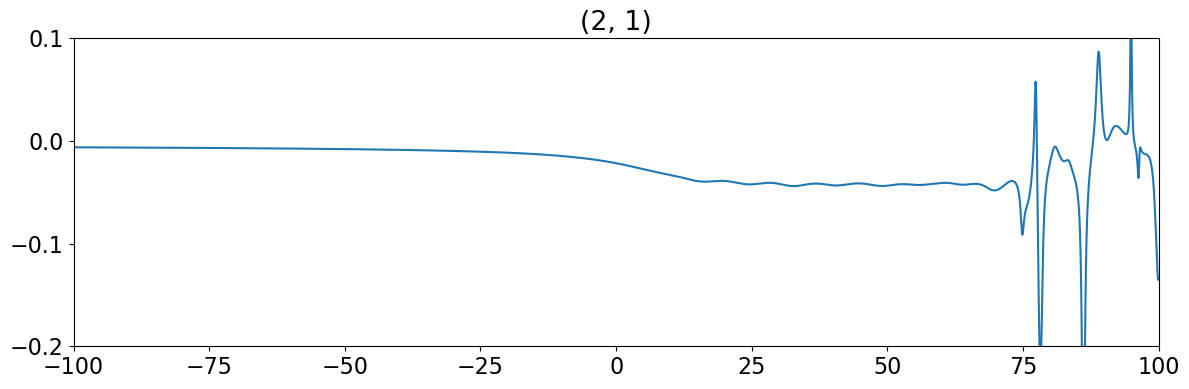

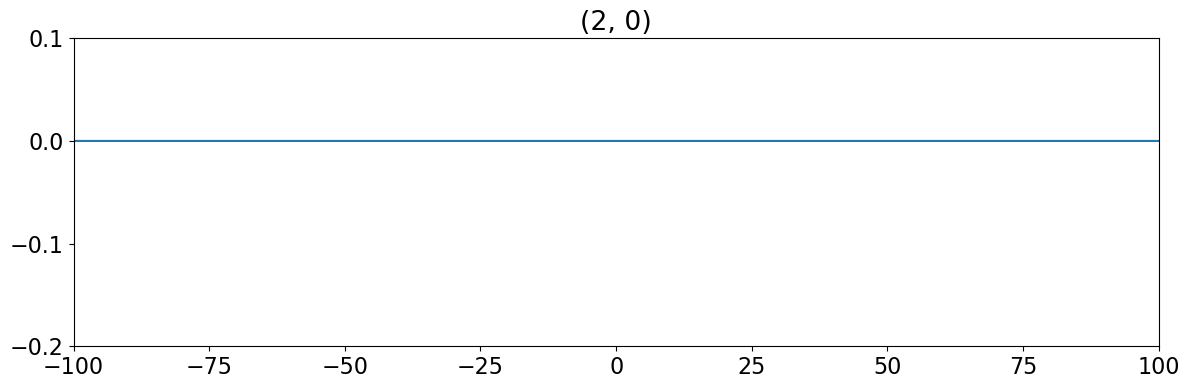

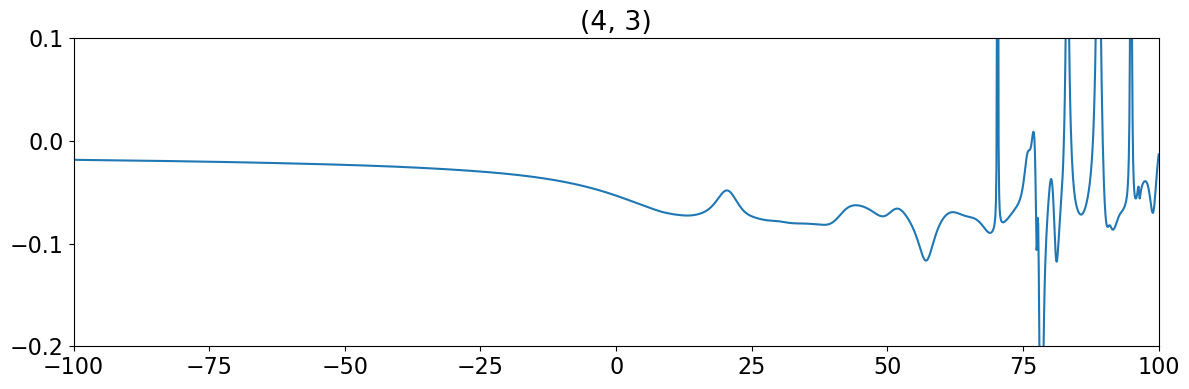

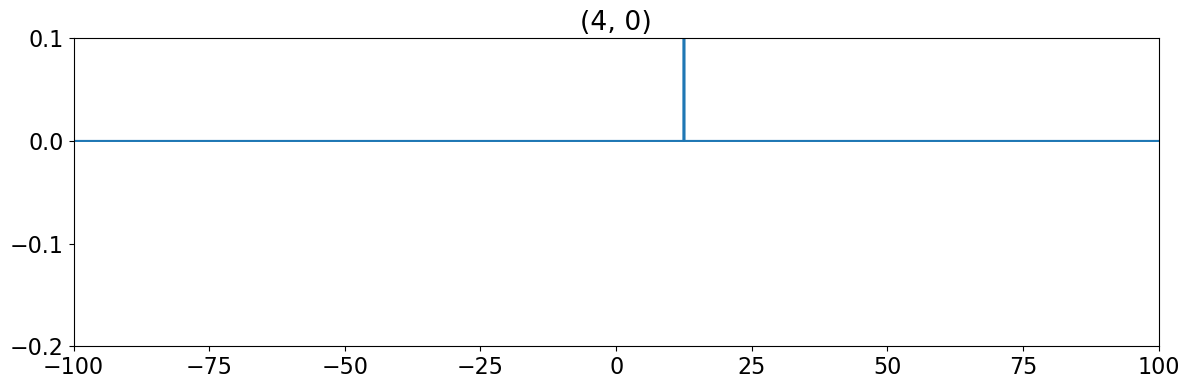

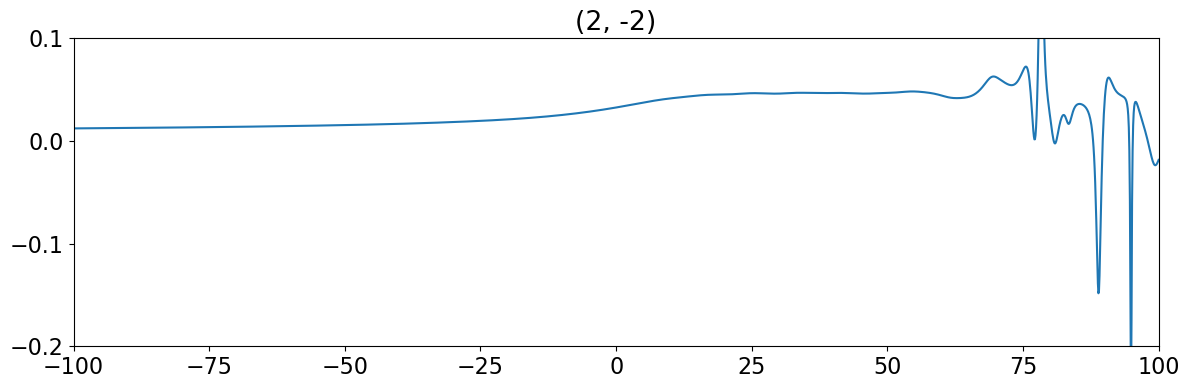

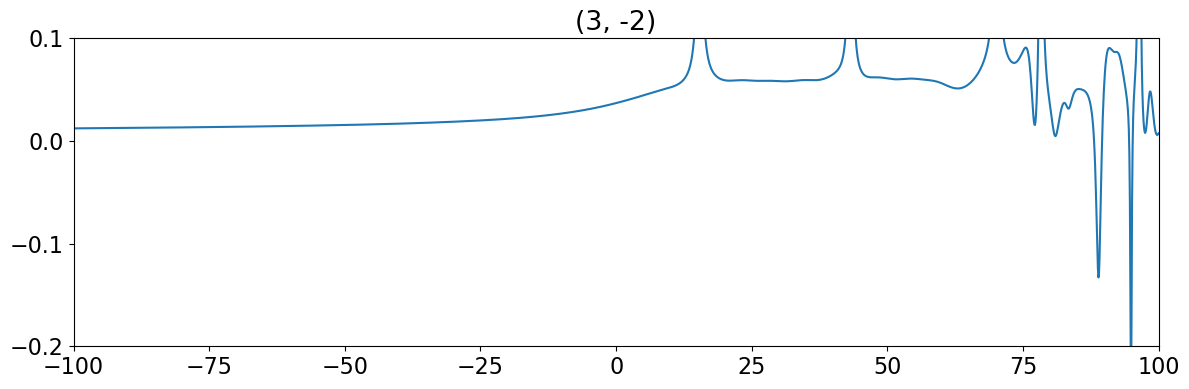

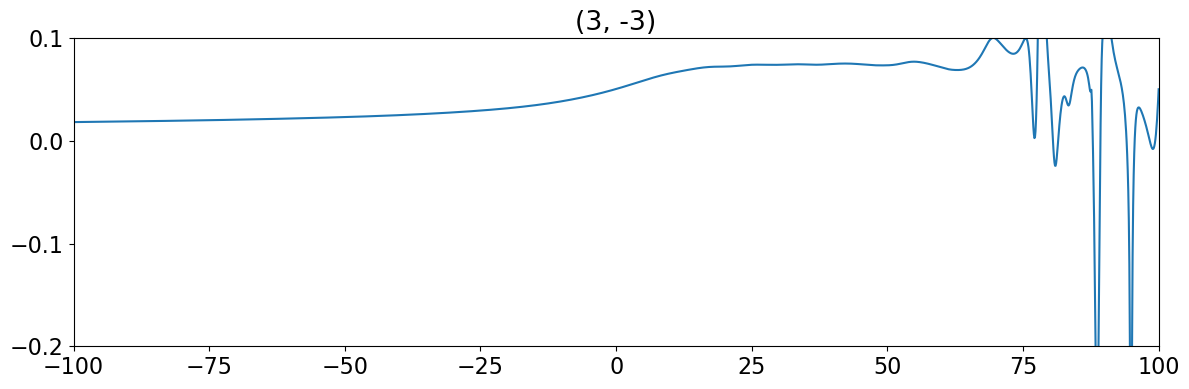

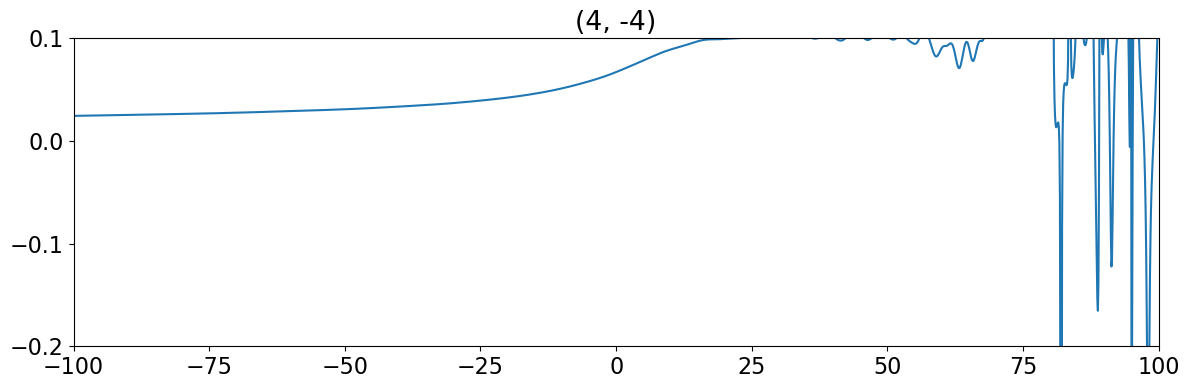

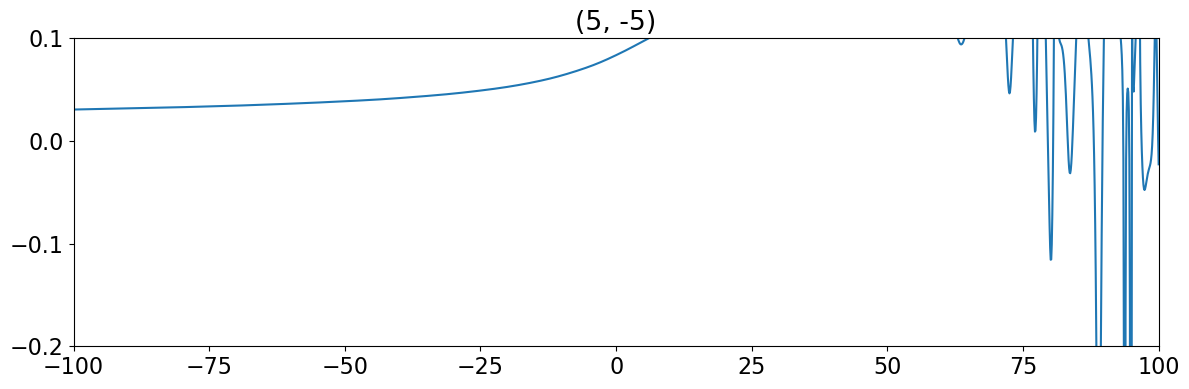

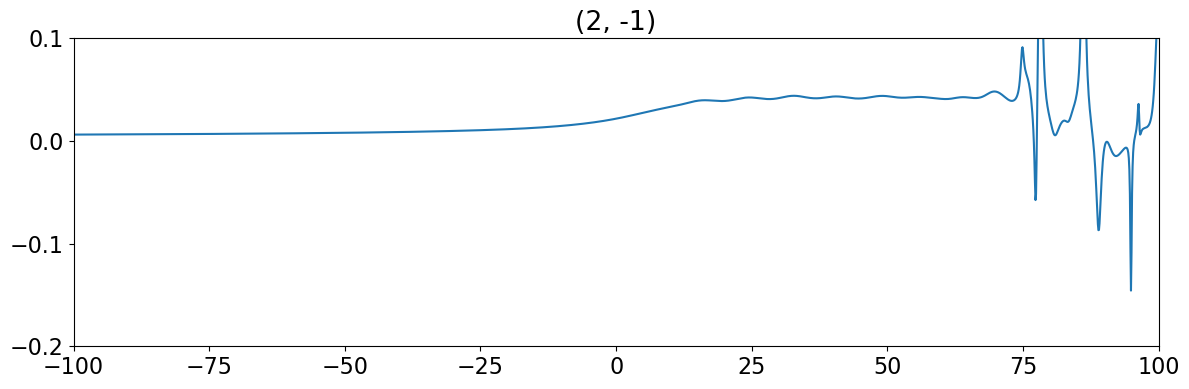

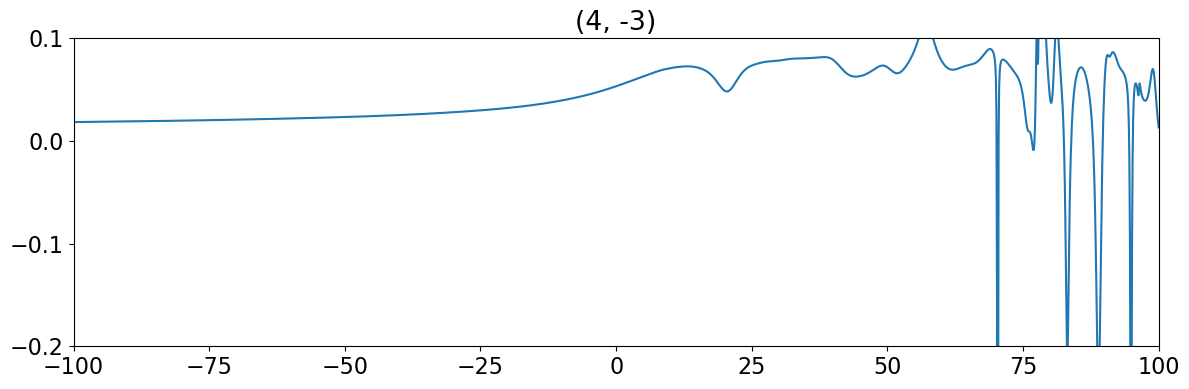

In [69]:
for lm in h.keys():
    plt.figure(figsize=(14, 4))
    plt.plot(t[1:], np.diff(np.unwrap(np.angle(h[lm]))))
    plt.xlim(-100, 100)
    plt.ylim(-0.2, 0.1)
    plt.title(lm)
    plt.show()
    plt.close()

In [70]:
phase = {}
for lm in h.keys():
    phase[lm] = np.unwrap(np.angle(h[lm]))

In [71]:
# I don't think this equation is quite correct.
# it doesn't seem to work for the (4,4) mode..
def delta_phi_fn(m):
    z = (-1)*(-1.j)**m
    return np.arctan2(z.imag, z.real)

In [72]:
phase.keys()

dict_keys([(2, 2), (3, 2), (3, 3), (3, 0), (4, 4), (5, 5), (2, 1), (2, 0), (4, 3), (4, 0), (2, -2), (3, -2), (3, -3), (4, -4), (5, -5), (2, -1), (4, -3)])

In [73]:
# modes = [(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (4, 3)]
modes = [(2, 2), (3, 2), (4, 4)]

(-4000.0, -2000.0)

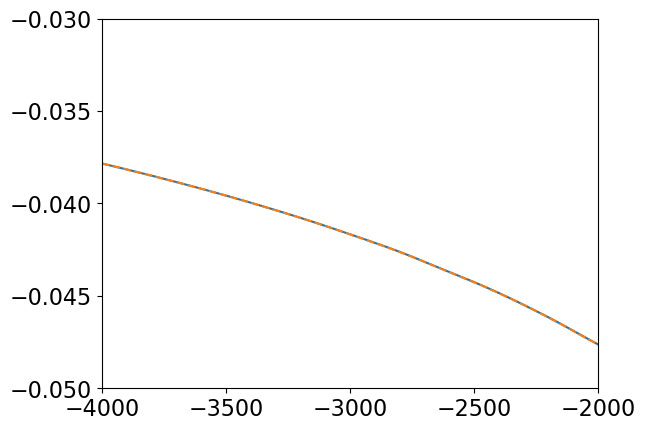

In [74]:
plt.plot(t, IUS(t, phase[2,2]).derivative()(t))
plt.plot(t, IUS(t, phase[3,2]).derivative()(t), ls='--')
plt.ylim(-0.05,-0.03)
plt.xlim(-4000, -2000)

(-4000.0, -2000.0)

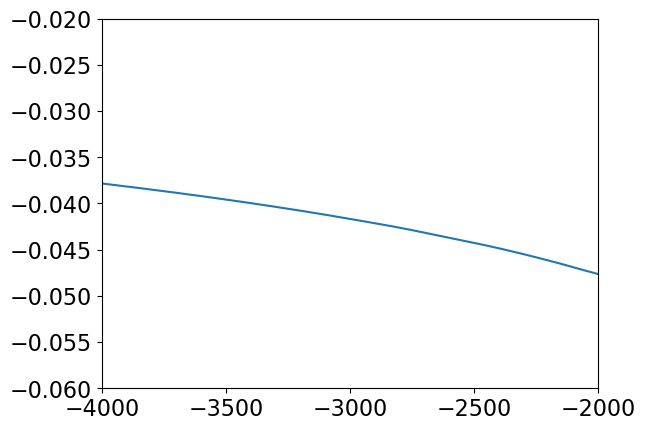

In [75]:
plt.plot(t, IUS(t, phase[3,2]).derivative()(t))
plt.ylim(-0.06,-0.02)
plt.xlim(-4000, -2000)

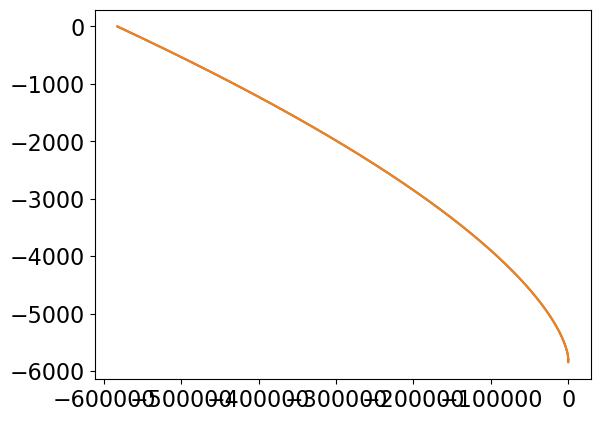

In [76]:
plt.plot(t, (phase[2,2]))
plt.plot(t, (phase[3,2]))
# plt.xlim(-9000, 0)
# plt.ylim(-0.25, 0.25)

(-0.25, 0.25)

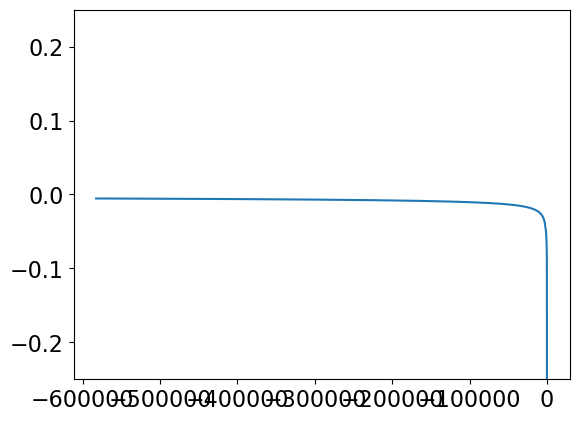

In [77]:
plt.plot(t, phase[(3,2)] - (phase[2,2]))
# plt.xlim(-9000, 0)
plt.ylim(-0.25, 0.25)

(-0.25, 0.25)

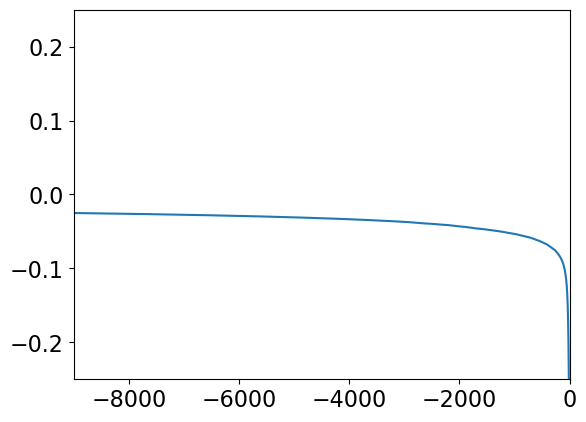

In [78]:
plt.plot(t, phase[(3,2)] - (phase[2,2]))
plt.xlim(-9000, 0)
plt.ylim(-0.25, 0.25)

(-0.25, 0.25)

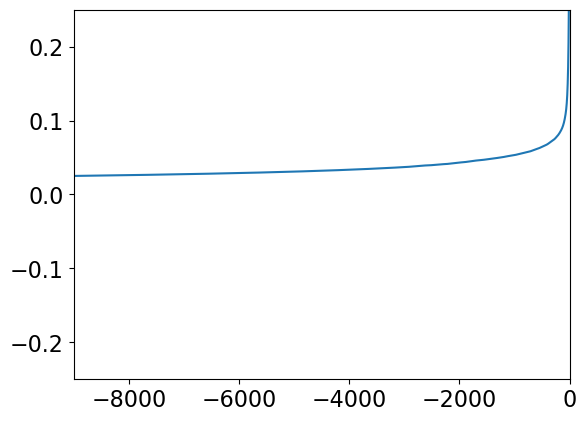

In [79]:
plt.plot(t, delta_phi_fn(2) - (phase[(3,2)] - (phase[2,2]/2 * 2)))
plt.xlim(-9000, 0)
plt.ylim(-0.25, 0.25)

In [80]:
plt.figure(figsize=(14, 6), dpi=100)
# for mode in phase.keys():
for mode in modes:
    ell=mode[0]
    mm=mode[1]
    plt.plot(t, phase[mode] - (phase[2,2]/2 * mm), label=mode)
    plt.axhline(delta_phi_fn(mm), c='k', ls='--', alpha=0.5)
plt.ylim(-5, 6)
# plt.xlim(-1000, 100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [81]:
2*np.pi

6.283185307179586

In [82]:
plt.plot(t, np.unwrap(np.mod(2*phase[(3,3)] - 3*phase[2,2], 2*np.pi)))
# plt.ylim(3,3.1)

(2.141592653589793, 4.141592653589793)

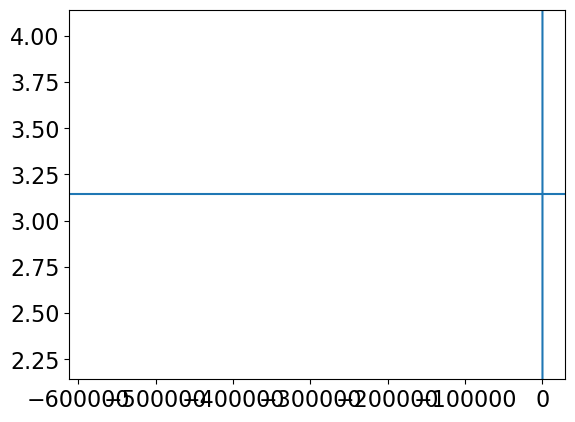

In [83]:
plt.plot(t, np.unwrap(np.mod(2*phase[(3,3)] - 3*phase[2,2], 2*np.pi)))
plt.axhline(np.pi)
plt.ylim(np.pi-1, np.pi+1)

(-1.0, 1.0)

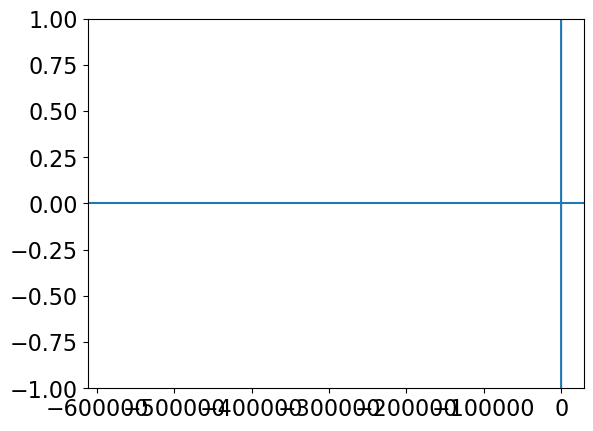

In [84]:
plt.plot(t, np.unwrap(np.mod(2*phase[(4,4)] - 4*phase[2,2], 2*np.pi)))
plt.axhline(0)
plt.ylim(-1, +1)

In [85]:
plt.plot(t, np.unwrap(np.mod(2*phase[(3,2)] - 2*phase[2,2], 2*np.pi)))
plt.axhline(0)
plt.ylim(-1, +1)

(-1.0, 1.0)

In [86]:
(phase[(3,2)] - 2*phase[2,2]/2)[0]

-0.005403060707503259

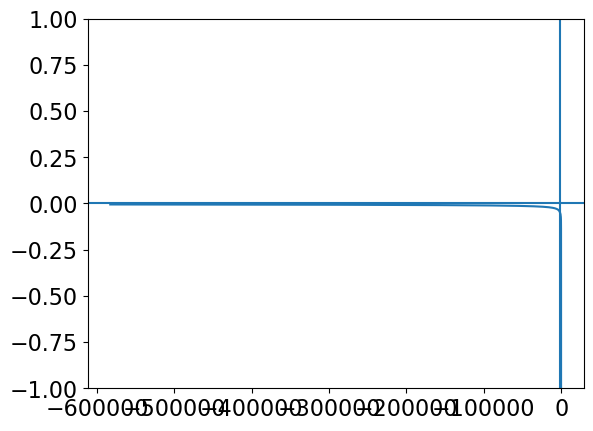

In [87]:
plt.plot(t, phase[(3,2)] - 2*phase[2,2]/2)
plt.axhline(0)
plt.ylim(-1, +1)
# page 10: https://arxiv.org/abs/1812.07865
# orbital phase is set to zero at t=-1000M
plt.axvline(-1000)

(-0.25, 0.25)

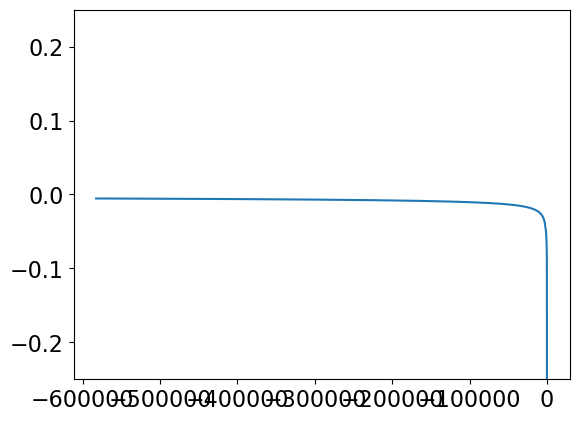

In [88]:
plt.plot(t, phase[(3,2)] - phase[2,2])
plt.ylim(-0.25,0.25)

In [89]:
plt.plot(t, phase[(3,2)] - phase[2,2])
plt.xlim(-10000, 100)
plt.ylim(-0.25, 0.4)

(-0.25, 0.4)

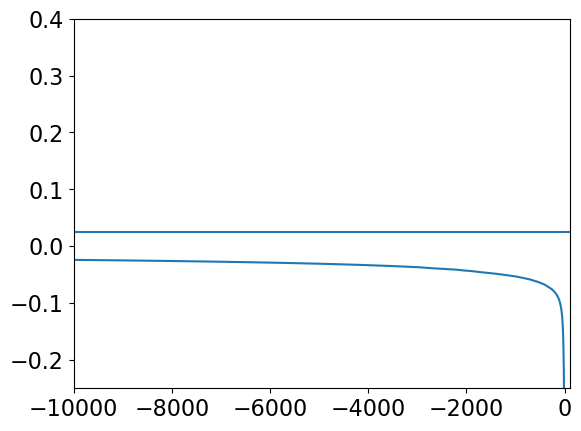

In [90]:
plt.plot(t, phase[(3,2)] - phase[2,2])
plt.xlim(-10000, 100)
plt.ylim(-0.25, 0.4)
plt.axhline(0.025)

In [91]:
plt.plot(t, np.mod(2*phase[(3,2)] - 2*phase[2,2], 2*np.pi))
plt.xlim(-10000, 100)
plt.ylim(-0.25, 0.4)

(-0.25, 0.4)

(-1.0, 1.0)

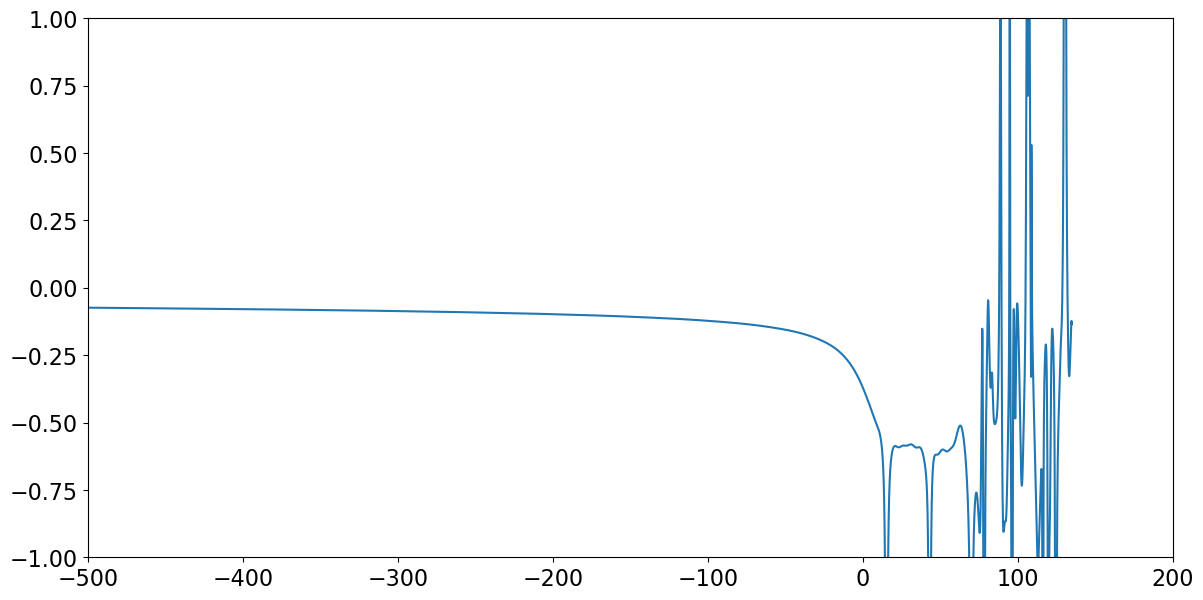

In [92]:
plt.figure(figsize=(14,7))
lm=(3,2)
plt.plot(t, IUS(t, np.unwrap(np.angle(h[lm]))).derivative()(t))
plt.xlim(-500, 200)
plt.ylim(-1,1)

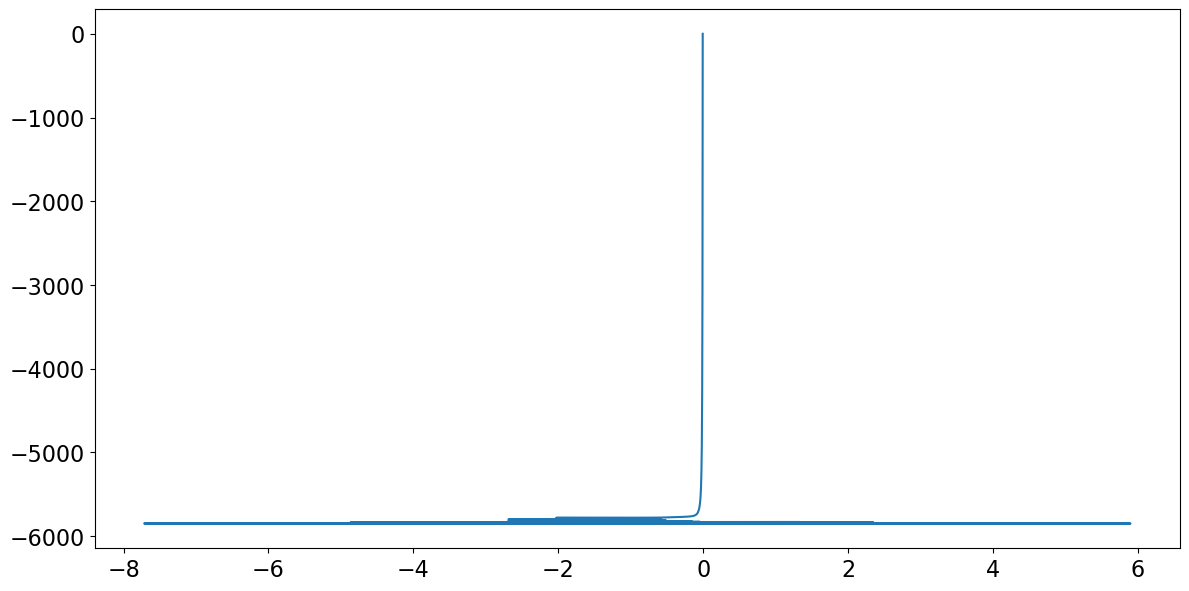

In [93]:
plt.figure(figsize=(14,7))
lm=(3,2)
plt.plot(IUS(t, np.unwrap(np.angle(h[lm]))).derivative()(t), np.unwrap(np.angle(h[lm])))
# plt.xlim(-500, 200)
# plt.ylim(-1,1)

# phase diff

In [94]:
# here we compute
# delta_phi = phi_lm - m*phi_22/2
# we unwrap delta_phi
# then we take mod 2pi
# then we try and fix cases that fail to unwrap by subtracting 2pi from cases where this is > 1
# not sure if the is correct though...

l = 3
m = 2

# my def
delta_phi = np.mod(np.unwrap(phase[l,m]-m*phase[2,2]/2), 2*np.pi)

delta_phi = np.array(delta_phi)
mask = delta_phi > 1
delta_phi[mask] = delta_phi[mask]-2*np.pi
delta_phi = delta_phi

In [95]:
plt.figure(figsize=(14,6))
plt.plot(t, delta_phi)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim(-1200, 100)
# plt.xlim(-4000, 100)
# plt.xlim(-1200, 100)
# plt.ylim(-1,1)
# plt.yscale('log')

# plt.axhline(0, c='k', ls='--')

In [96]:
plt.figure(figsize=(14,6))
plt.plot(t, delta_phi)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-1200, 100)
# plt.xlim(-4000, 100)
# plt.xlim(-1200, 100)
# plt.ylim(-1,1)
# plt.yscale('log')

# plt.axhline(0, c='k', ls='--')

(-1200.0, 100.0)

(-0.25, 0.25)

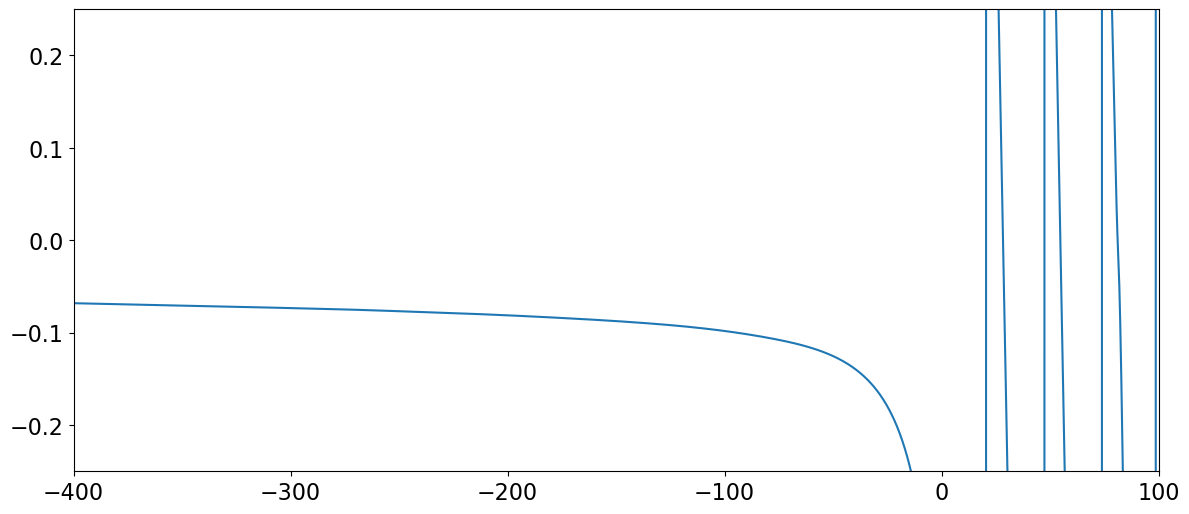

In [97]:
plt.figure(figsize=(14,6))
plt.plot(t, delta_phi)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-400, 100)
plt.ylim(-0.25,0.25)
# plt.xlim(-4000, 100)
# plt.xlim(-1200, 100)
# plt.ylim(-1,1)
# plt.yscale('log')

# plt.axhline(0, c='k', ls='--')